In [201]:
import pandas as pd
housing = pd.read_csv('D:\ML Content\Data\Housing.csv')

In [202]:
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [203]:
housing.furnishingstatus.describe()

count                545
unique                 3
top       semi-furnished
freq                 227
Name: furnishingstatus, dtype: object

In [204]:
status = pd.get_dummies(housing.furnishingstatus, drop_first=True)

In [205]:
housing = pd.concat([housing,status], axis = 1)

In [206]:
housing.drop('furnishingstatus', axis =1, inplace = True)

In [207]:
# Adding extra column that may be helpful in calculation called as dericed column
housing['Area_perbedroom'] = housing.area /housing.bedrooms
housing['Area_perbath'] = housing.area/housing.bathrooms

In [208]:
housing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,Area_perbedroom,Area_perbath
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,0,1,1500.000000,3000.0
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,1,0,800.000000,2400.0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,0,1,1810.000000,3620.0
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,0,0,970.000000,2910.0
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,0,1,1283.333333,3850.0


In [209]:
housing.loc[housing['mainroad'] == 'yes', ['mainroad']] =1

In [210]:
housing.loc[housing['mainroad'] == 'no', ['mainroad']] =0
housing.loc[housing.guestroom=='yes', ['guestroom']]=1
housing.loc[housing.guestroom=='no', ['guestroom']]=0
housing.loc[housing.basement=='yes',['basement']]=1
housing.loc[housing.basement=='no',['basement']]=0
housing.loc[housing.hotwaterheating=='yes',['hotwaterheating']]=1
housing.loc[housing.hotwaterheating=='no',['hotwaterheating']]=0
housing.loc[housing.airconditioning=='yes',['airconditioning']]=1
housing.loc[housing.airconditioning=='no',['airconditioning']]=0
housing.loc[housing.prefarea=='yes',['prefarea']]=1
housing.loc[housing.prefarea=='no',['prefarea']]=0

# Rescaling

In [211]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'Area_perbedroom', 'Area_perbath'],
      dtype='object')

In [212]:
x = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'Area_perbedroom', 'Area_perbath']]
y = housing.price

In [213]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 110)

In [214]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
lm_1 = sm.OLS(y_train, x_train).fit()

In [215]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     57.40
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           2.89e-86
Time:                        21:55:01   Log-Likelihood:                -5807.0
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     365   BIC:                         1.171e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.195e+06   5.69e+05     

In [216]:
import numpy as np
def normalize(x):
    return ((x-np.min(x))/(max(x)-min(x)))

In [217]:
housing = housing.apply(normalize)

# Agin building the model after normalizing

In [218]:
x = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'Area_perbedroom', 'Area_perbath']]
y = housing.price

In [219]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 119)

In [220]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
lm_1 = sm.OLS(y_train, x_train).fit()

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [221]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     57.92
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           9.28e-87
Time:                        21:55:02   Log-Likelihood:                 367.82
No. Observations:                 381   AIC:                            -703.6
Df Residuals:                     365   BIC:                            -640.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0792      0.038     

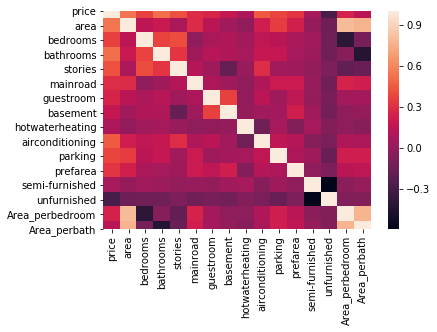

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(housing.corr())

In [223]:
# making A VIF function

# def vif_cal(Input_data, dep_col):
#     vif_df = pd.DataFrame(columns=['var', 'vif'])
#     x_var =Input_data.drop([dep_col], axis = 1)
#     x_var_name = x_var.columns
#     for i in range(0, x_var_name.shape[0]):
#         y = x_var[x_var_name[i]]
#         x = x_var[x_var_name.drop(x_var_name[i])]
#         Rsq = sm.OLS(y,x).fit().rsquared
#         vif = round(1/(1-Rsq), 2)
#         vif_df.loc[i] = [x_var_name[i], vif]
#     return vif_df.sort_values(by='vif', axis = 0, ascending=False, inplace=True)
# vif_cal(Input_data=housing, dep_col='price')

In [224]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [225]:
vif_cal(input_data=housing, dependent_col='price')

,Var,Vif
14,Area_perbath,68.71
0,area,43.90
13,Area_perbedroom,26.28
1,bedrooms,13.78
2,bathrooms,10.21
4,mainroad,7.46
3,stories,2.79
11,semi-furnished,2.51
12,unfurnished,2.21
6,basement,2.05


In [226]:
x_train = x_train.drop('Area_perbedroom', axis =1)


In [227]:
lm_2 = sm.OLS(y_train, x_train).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     61.91
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           2.19e-87
Time:                        21:55:04   Log-Likelihood:                 367.14
No. Observations:                 381   AIC:                            -704.3
Df Residuals:                     366   BIC:                            -645.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0463      0.025     

In [228]:
vif_cal(input_data=housing.drop('Area_perbedroom', axis = 1), dependent_col='price')

,Var,Vif
13,Area_perbath,48.21
0,area,43.37
1,bedrooms,8.13
2,bathrooms,8.10
4,mainroad,6.32
3,stories,2.78
11,semi-furnished,2.40
6,basement,2.05
9,parking,2.01
12,unfurnished,2.00


In [229]:
x_train = x_train.drop('bathrooms', axis = 1)

In [230]:
lm_3 = sm.OLS(y_train,x_train).fit()

In [231]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     66.67
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           3.78e-88
Time:                        21:55:04   Log-Likelihood:                 366.76
No. Observations:                 381   AIC:                            -705.5
Df Residuals:                     367   BIC:                            -650.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0548      0.023     

In [232]:
vif_cal(input_data=housing.drop('bathrooms', axis = 1), dependent_col='price')

,Var,Vif
0,area,22.09
12,Area_perbedroom,20.83
13,Area_perbath,11.52
1,bedrooms,10.14
3,mainroad,7.45
2,stories,2.79
10,semi-furnished,2.49
11,unfurnished,2.21
5,basement,2.01
8,parking,1.99


In [233]:
x_train = x_train.drop('semi-furnished', axis = 1)

In [234]:
lm_4 = sm.OLS(y_train, x_train).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     72.37
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           4.71e-89
Time:                        21:55:05   Log-Likelihood:                 366.67
No. Observations:                 381   AIC:                            -707.3
Df Residuals:                     368   BIC:                            -656.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0584      0.021     

In [235]:
vif_cal(input_data=housing.drop('semi-furnished', axis=1), dependent_col='price')

,Var,Vif
13,Area_perbath,68.03
0,area,41.23
12,Area_perbedroom,25.18
1,bedrooms,12.47
2,bathrooms,10.15
4,mainroad,7.44
3,stories,2.79
6,basement,2.05
9,parking,2.02
8,airconditioning,1.76


In [236]:
x_train = x_train.drop('Area_perbath', axis = 1)

In [237]:
lm_5 = sm.OLS(y_train, x_train).fit()

In [238]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     62.87
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           1.20e-77
Time:                        21:55:07   Log-Likelihood:                 336.93
No. Observations:                 381   AIC:                            -649.9
Df Residuals:                     369   BIC:                            -602.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0011      0.021     

In [239]:
vif_cal(input_data=housing.drop('Area_perbath', axis = 1), dependent_col='price')

,Var,Vif
0,area,20.72
13,Area_perbedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


In [240]:
# Predicting based on Model 5
x_test_m5 = sm.add_constant(x_test)

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [241]:
x_test_m5 = x_test_m5.drop(['Area_perbedroom', 'bathrooms', 'semi-furnished', 'Area_perbath'], axis = 1)

In [242]:
y_pred_m5 = lm_5.predict(x_test_m5)

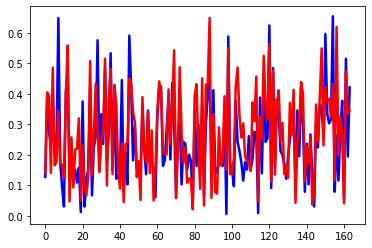

In [260]:
# Model evaluation
# Atual vs predicted
c = [i for i in range(0,len(y_test))]
fig = plt.figure()
plt.plot(c, y_test, color = 'blue', linewidth = 2.5, linestyle = '-')
plt.plot(c, y_pred_m5, color= 'red', linewidth=2.5, linestyle= '-')


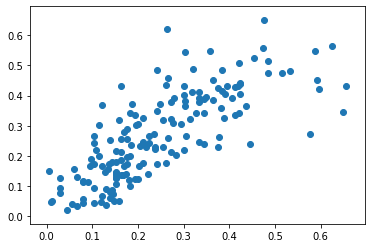

In [261]:
plt.scatter(y_test, y_pred_m5)

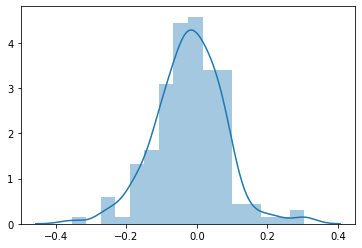

In [262]:
sns.distplot(y_test-y_pred_m5)

In [264]:

from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_m5)) 
print(RMSE)

0.10004960967164685
